## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [365]:
import pandas as pd

In [366]:
df = pd.read_csv('WineData.csv')
df.head()

Unnamed: 0  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  \
0           0    14.23        1.71  2.43          15.6        127   
1           1    13.20        1.78  2.14          11.2        100   
2           2    13.16        2.36  2.67          18.6        101   
3           3    14.37        1.95  2.50          16.8        113   
4           4    13.24        2.59  2.87          21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [367]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [368]:
df.info()
#There is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [369]:
df.var()

Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

In [370]:
corr = df.corr()

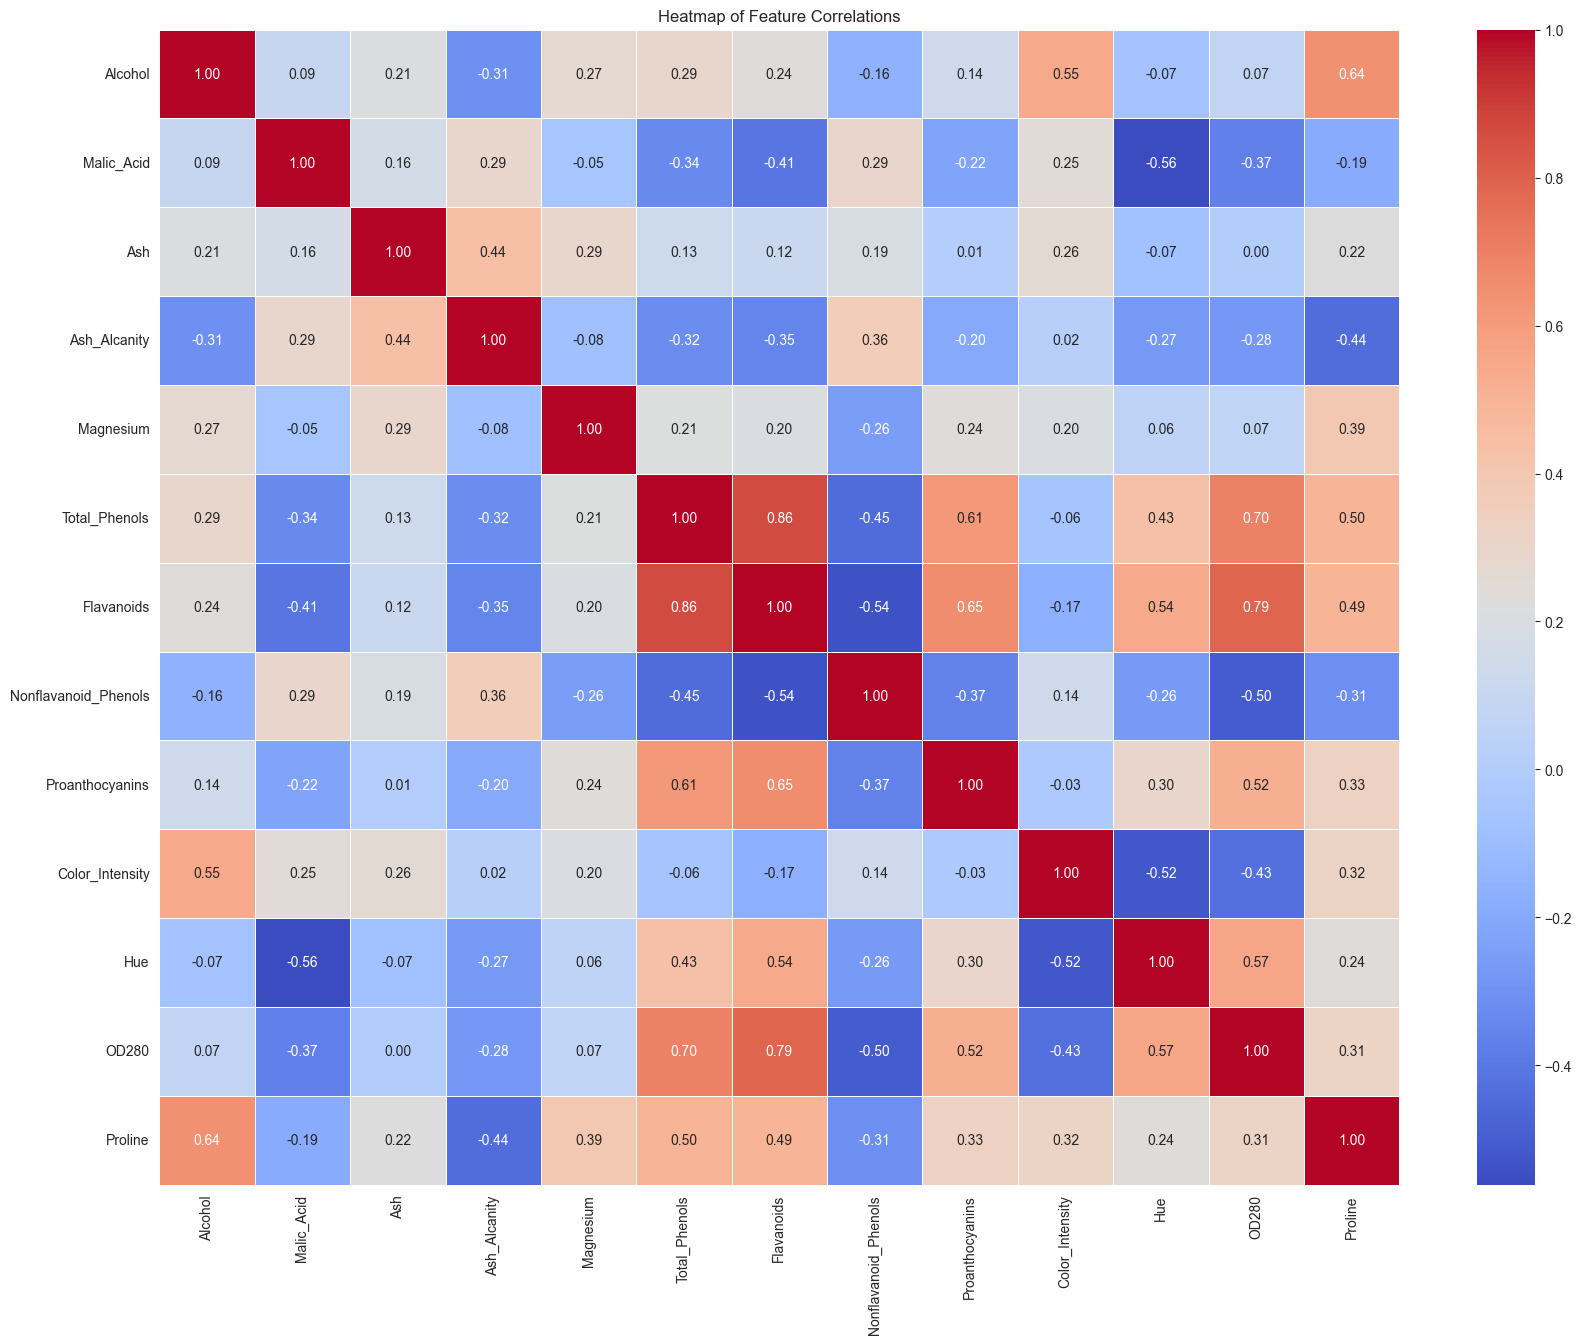

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()


In [372]:
df=df.drop('Flavanoids', axis=1)
#As Flavanoids has high corellation with 0D280 and Total_phenols
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  OD280  \
0                    0.28             2.29             5.64  1.04   3.92   
1                    0.26             1.28             4.38  1.05   3.40   
2                    0.30             2.81             5.68  1.03   3.17   
3                    0.24             2.18             7.80  0.86   3.45   
4                    0.39             1.82             4.32  1.04   2.93   
..                    ...              ...              ...   ...    ...   
173                  0.52             1.06             7.70  0.64   1.74   
174                  0.43             1.41             7.30  0.70   1.56   
175                  0.43             1.35            10.20  0.59   1.56   
176                  0.53             1.46             9.30  0.60   1.62   
177                  0.56             1.35             9.20  0.61   1.60   

     Proline  
0       1065  
1       1050  
2       1185  
3       1480  
4        735  
..       ...  
173      740  
174      750  
175      835  
176      840  
177      560  

[178 rows x 12 columns]

In [373]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sdf = scaler.fit_transform(df)

In [374]:
sdf = pd.DataFrame(sdf, columns=df.columns)
sdf

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity       Hue  \
0               -0.659563         1.224884         0.251717  0.362177   
1               -0.820719        -0.544721        -0.293321  0.406051   
2               -0.498407         2.135968         0.269020  0.318304   
3               -0.981875         1.032155         1.186068 -0.427544   
4                0.226796         0.401404        -0.319276  0.362177   
..                    ...              ...              ...       ...   
173              1.274310        -0.930179         1.142811 -1.392758   
174              0.549108        -0.316950         0.969783 -1.129518   
175              0.549108        -0.422075         2.224236 -1.612125   
176              1.354888        -0.229346         1.834923 -1.568252   
177              1.596623        -0.422075         1.791666 -1.524378   

        OD280   Proline  
0    1.847920  1.013009  
1    1.113449  0.965242  
2    0.788587  1.395148  
3    1.184071  2.334574  
4    0.449601 -0.037874  
..        ...       ...  
173 -1.231206 -0.021952  
174 -1.485445  0.009893  
175 -1.485445  0.280575  
176 -1.400699  0.296498  
177 -1.428948 -0.595160  

[178 rows x 12 columns]

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [375]:
from sklearn.cluster import KMeans

In [376]:
wcss = [ ]
clusetr = range(1,100)

for k in clusetr:
    km = KMeans(n_clusters=k)
    km.fit(sdf)
    wcss.append(km.inertia_)

In [377]:
wcss

[2136.0,
 1595.80820967754,
 1228.6348344346827,
 1153.3249964323697,
 1089.7406498026141,
 1032.3878471819958,
 975.6001817875488,
 925.9673603066273,
 923.594811783026,
 862.813019764216,
 811.5943233722173,
 761.8736167204502,
 786.650285203546,
 741.6844548925187,
 738.4408932052961,
 674.555889679232,
 688.2823889241397,
 645.9796522742299,
 646.6137846263172,
 622.1762993419658,
 625.3363776214659,
 591.1540344148815,
 559.0456607838929,
 553.6678872118582,
 550.2874288786883,
 532.9136773620073,
 528.1355967891101,
 514.9280777414259,
 514.6004133913663,
 494.7041907901404,
 472.030407413603,
 475.6008936940905,
 462.21770080289383,
 464.6582181904369,
 432.7392352660123,
 441.65765818184485,
 429.0294458397549,
 449.1966479895734,
 412.92302712876665,
 399.4233012947142,
 411.4681532385717,
 396.94354228092635,
 384.9057838590461,
 385.54742688419594,
 370.6033434192563,
 352.7488449325514,
 364.90576912998523,
 360.4128617898708,
 349.9214057037568,
 338.82380012917025,
 325.7

In [378]:
from kneed import KneeLocator as kn
kl = kn(clusetr, wcss, direction = 'decreasing', curve='convex')

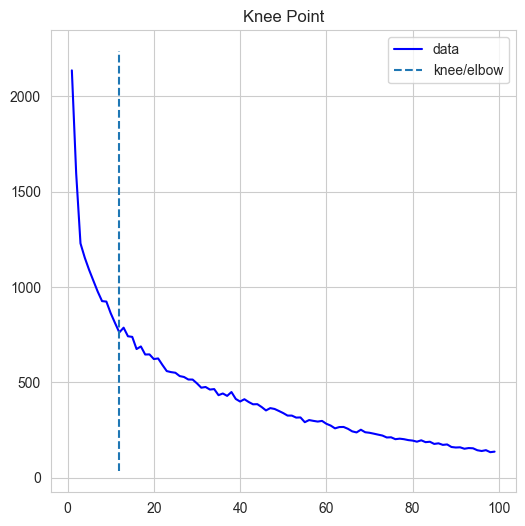

In [379]:
sns.set_style('whitegrid')
kl.plot_knee()

In [380]:
kl.knee

12

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [381]:
optimal_km = KMeans(n_clusters=12)

In [382]:
optimal_km.fit(sdf)
sdf['clust'] = optimal_km.predict(sdf)
sdf.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity       Hue     OD280  \
0             -0.659563         1.224884         0.251717  0.362177  1.847920   
1             -0.820719        -0.544721        -0.293321  0.406051  1.113449   
2             -0.498407         2.135968         0.269020  0.318304  0.788587   
3             -0.981875         1.032155         1.186068 -0.427544  1.184071   
4              0.226796         0.401404        -0.319276  0.362177  0.449601   

    Proline  clust  
0  1.013009      9  
1  0.965242      8  
2  1.395148      7  
3  2.334574      2  
4 -0.037874      7

In [383]:
sdf.to_csv('test.csv')

### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [384]:
clust = sdf['clust']
clust

0      9
1      8
2      7
3      2
4      7
      ..
173    0
174    5
175    5
176    5
177    5
Name: clust, Length: 178, dtype: int32

In [385]:
sdf = sdf.drop('clust',axis=1) # Else there was a problem in Dimension
df = scaler.inverse_transform(sdf) #makes array here
df = pd.DataFrame(df, columns=sdf.columns)
df['cluster'] = clust
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6      127.0           2.80   
1      13.20        1.78  2.14          11.2      100.0           2.65   
2      13.16        2.36  2.67          18.6      101.0           2.80   
3      14.37        1.95  2.50          16.8      113.0           3.85   
4      13.24        2.59  2.87          21.0      118.0           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5       95.0           1.68   
174    13.40        3.91  2.48          23.0      102.0           1.80   
175    13.27        4.28  2.26          20.0      120.0           1.59   
176    13.17        2.59  2.37          20.0      120.0           1.65   
177    14.13        4.10  2.74          24.5       96.0           2.05   

     Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  OD280  \
0                    0.28             2.29             5.64  1.04   3.92   
1                    0.26             1.28             4.38  1.05   3.40   
2                    0.30             2.81             5.68  1.03   3.17   
3                    0.24             2.18             7.80  0.86   3.45   
4                    0.39             1.82             4.32  1.04   2.93   
..                    ...              ...              ...   ...    ...   
173                  0.52             1.06             7.70  0.64   1.74   
174                  0.43             1.41             7.30  0.70   1.56   
175                  0.43             1.35            10.20  0.59   1.56   
176                  0.53             1.46             9.30  0.60   1.62   
177                  0.56             1.35             9.20  0.61   1.60   

     Proline  cluster  
0     1065.0        9  
1     1050.0        8  
2     1185.0        7  
3     1480.0        2  
4      735.0        7  
..       ...      ...  
173    740.0        0  
174    750.0        5  
175    835.0        5  
176    840.0        5  
177    560.0        5  

[178 rows x 13 columns]

In [386]:
list_df = []
for i in range(12):
    list_df.append(df[df.cluster==i])

In [387]:
for i in range(12):
    print(f"Cluster {i} Mean Features")
    display(list_df[i].mean())


Cluster 0 Mean Features


Alcohol                  13.037917
Malic_Acid                3.661667
Ash                       2.393333
Ash_Alcanity             20.812500
Magnesium                96.708333
Total_Phenols             1.549167
Nonflavanoid_Phenols      0.441667
Proanthocyanins           0.919167
Color_Intensity           5.339167
Hue                       0.749167
OD280                     1.799167
Proline                 603.416667
cluster                   0.000000
dtype: float64

Cluster 1 Mean Features


Alcohol                  12.092500
Malic_Acid                1.665000
Ash                       2.495833
Ash_Alcanity             20.466667
Magnesium                98.583333
Total_Phenols             2.855000
Nonflavanoid_Phenols      0.266667
Proanthocyanins           1.973333
Color_Intensity           3.595000
Hue                       1.067500
OD280                     2.975000
Proline                 560.000000
cluster                   1.000000
dtype: float64

Cluster 2 Mean Features


Alcohol                   14.033333
Malic_Acid                 1.766667
Ash                        2.406667
Ash_Alcanity              16.188889
Magnesium                108.111111
Total_Phenols              3.298889
Nonflavanoid_Phenols       0.273333
Proanthocyanins            2.143333
Color_Intensity            7.350000
Hue                        1.077778
OD280                      3.044444
Proline                 1435.222222
cluster                    2.000000
dtype: float64

Cluster 3 Mean Features


Alcohol                  12.582143
Malic_Acid                1.351429
Ash                       1.902143
Ash_Alcanity             17.071429
Magnesium                88.928571
Total_Phenols             2.170000
Nonflavanoid_Phenols      0.286429
Proanthocyanins           1.365000
Color_Intensity           3.460000
Hue                       1.176429
OD280                     2.836429
Proline                 558.285714
cluster                   3.000000
dtype: float64

Cluster 4 Mean Features


Alcohol                  12.3140
Malic_Acid                2.5685
Ash                       2.2400
Ash_Alcanity             21.5450
Magnesium                88.2000
Total_Phenols             2.3430
Nonflavanoid_Phenols      0.3530
Proanthocyanins           1.6530
Color_Intensity           2.5125
Hue                       0.9195
OD280                     3.0535
Proline                 420.8000
cluster                   4.0000
dtype: float64

Cluster 5 Mean Features


Alcohol                  13.420667
Malic_Acid                3.082667
Ash                       2.578000
Ash_Alcanity             23.166667
Magnesium               107.000000
Total_Phenols             1.852667
Nonflavanoid_Phenols      0.414667
Proanthocyanins           1.484000
Color_Intensity           9.446000
Hue                       0.629333
OD280                     1.615333
Proline                 655.666667
cluster                   5.000000
dtype: float64

Cluster 6 Mean Features


Alcohol                  12.968333
Malic_Acid                2.879167
Ash                       2.265833
Ash_Alcanity             19.691667
Magnesium                92.166667
Total_Phenols             1.742500
Nonflavanoid_Phenols      0.519167
Proanthocyanins           1.176667
Color_Intensity           8.261667
Hue                       0.655833
OD280                     1.593333
Proline                 604.583333
cluster                   6.000000
dtype: float64

Cluster 7 Mean Features


Alcohol                   13.499091
Malic_Acid                 1.843636
Ash                        2.663182
Ash_Alcanity              19.513636
Magnesium                110.409091
Total_Phenols              2.771364
Nonflavanoid_Phenols       0.329545
Proanthocyanins            1.769545
Color_Intensity            5.021364
Hue                        1.119545
OD280                      3.070909
Proline                 1090.681818
cluster                    7.000000
dtype: float64

Cluster 8 Mean Features


Alcohol                   13.930769
Malic_Acid                 1.696923
Ash                        2.281538
Ash_Alcanity              15.184615
Magnesium                 95.846154
Total_Phenols              2.684615
Nonflavanoid_Phenols       0.269231
Proanthocyanins            2.025385
Color_Intensity            5.523077
Hue                        1.086923
OD280                      3.119231
Proline                 1150.769231
cluster                    8.000000
dtype: float64

Cluster 9 Mean Features


Alcohol                  13.765333
Malic_Acid                2.685333
Ash                       2.364667
Ash_Alcanity             16.486667
Magnesium               111.133333
Total_Phenols             2.860667
Nonflavanoid_Phenols      0.255333
Proanthocyanins           1.873333
Color_Intensity           5.160000
Hue                       0.955333
OD280                     3.440667
Proline                 928.000000
cluster                   9.000000
dtype: float64

Cluster 10 Mean Features


Alcohol                  12.077778
Malic_Acid                1.705000
Ash                       2.414444
Ash_Alcanity             21.194444
Magnesium                92.166667
Total_Phenols             1.847222
Nonflavanoid_Phenols      0.500000
Proanthocyanins           1.340000
Color_Intensity           2.887222
Hue                       1.134778
OD280                     2.440556
Proline                 536.888889
cluster                  10.000000
dtype: float64

Cluster 11 Mean Features


Alcohol                  12.1175
Malic_Acid                1.8600
Ash                       1.9300
Ash_Alcanity             17.5250
Magnesium               139.0000
Total_Phenols             2.3575
Nonflavanoid_Phenols      0.2625
Proanthocyanins           3.0300
Color_Intensity           2.9375
Hue                       1.0625
OD280                     2.7050
Proline                 741.7500
cluster                  11.0000
dtype: float64

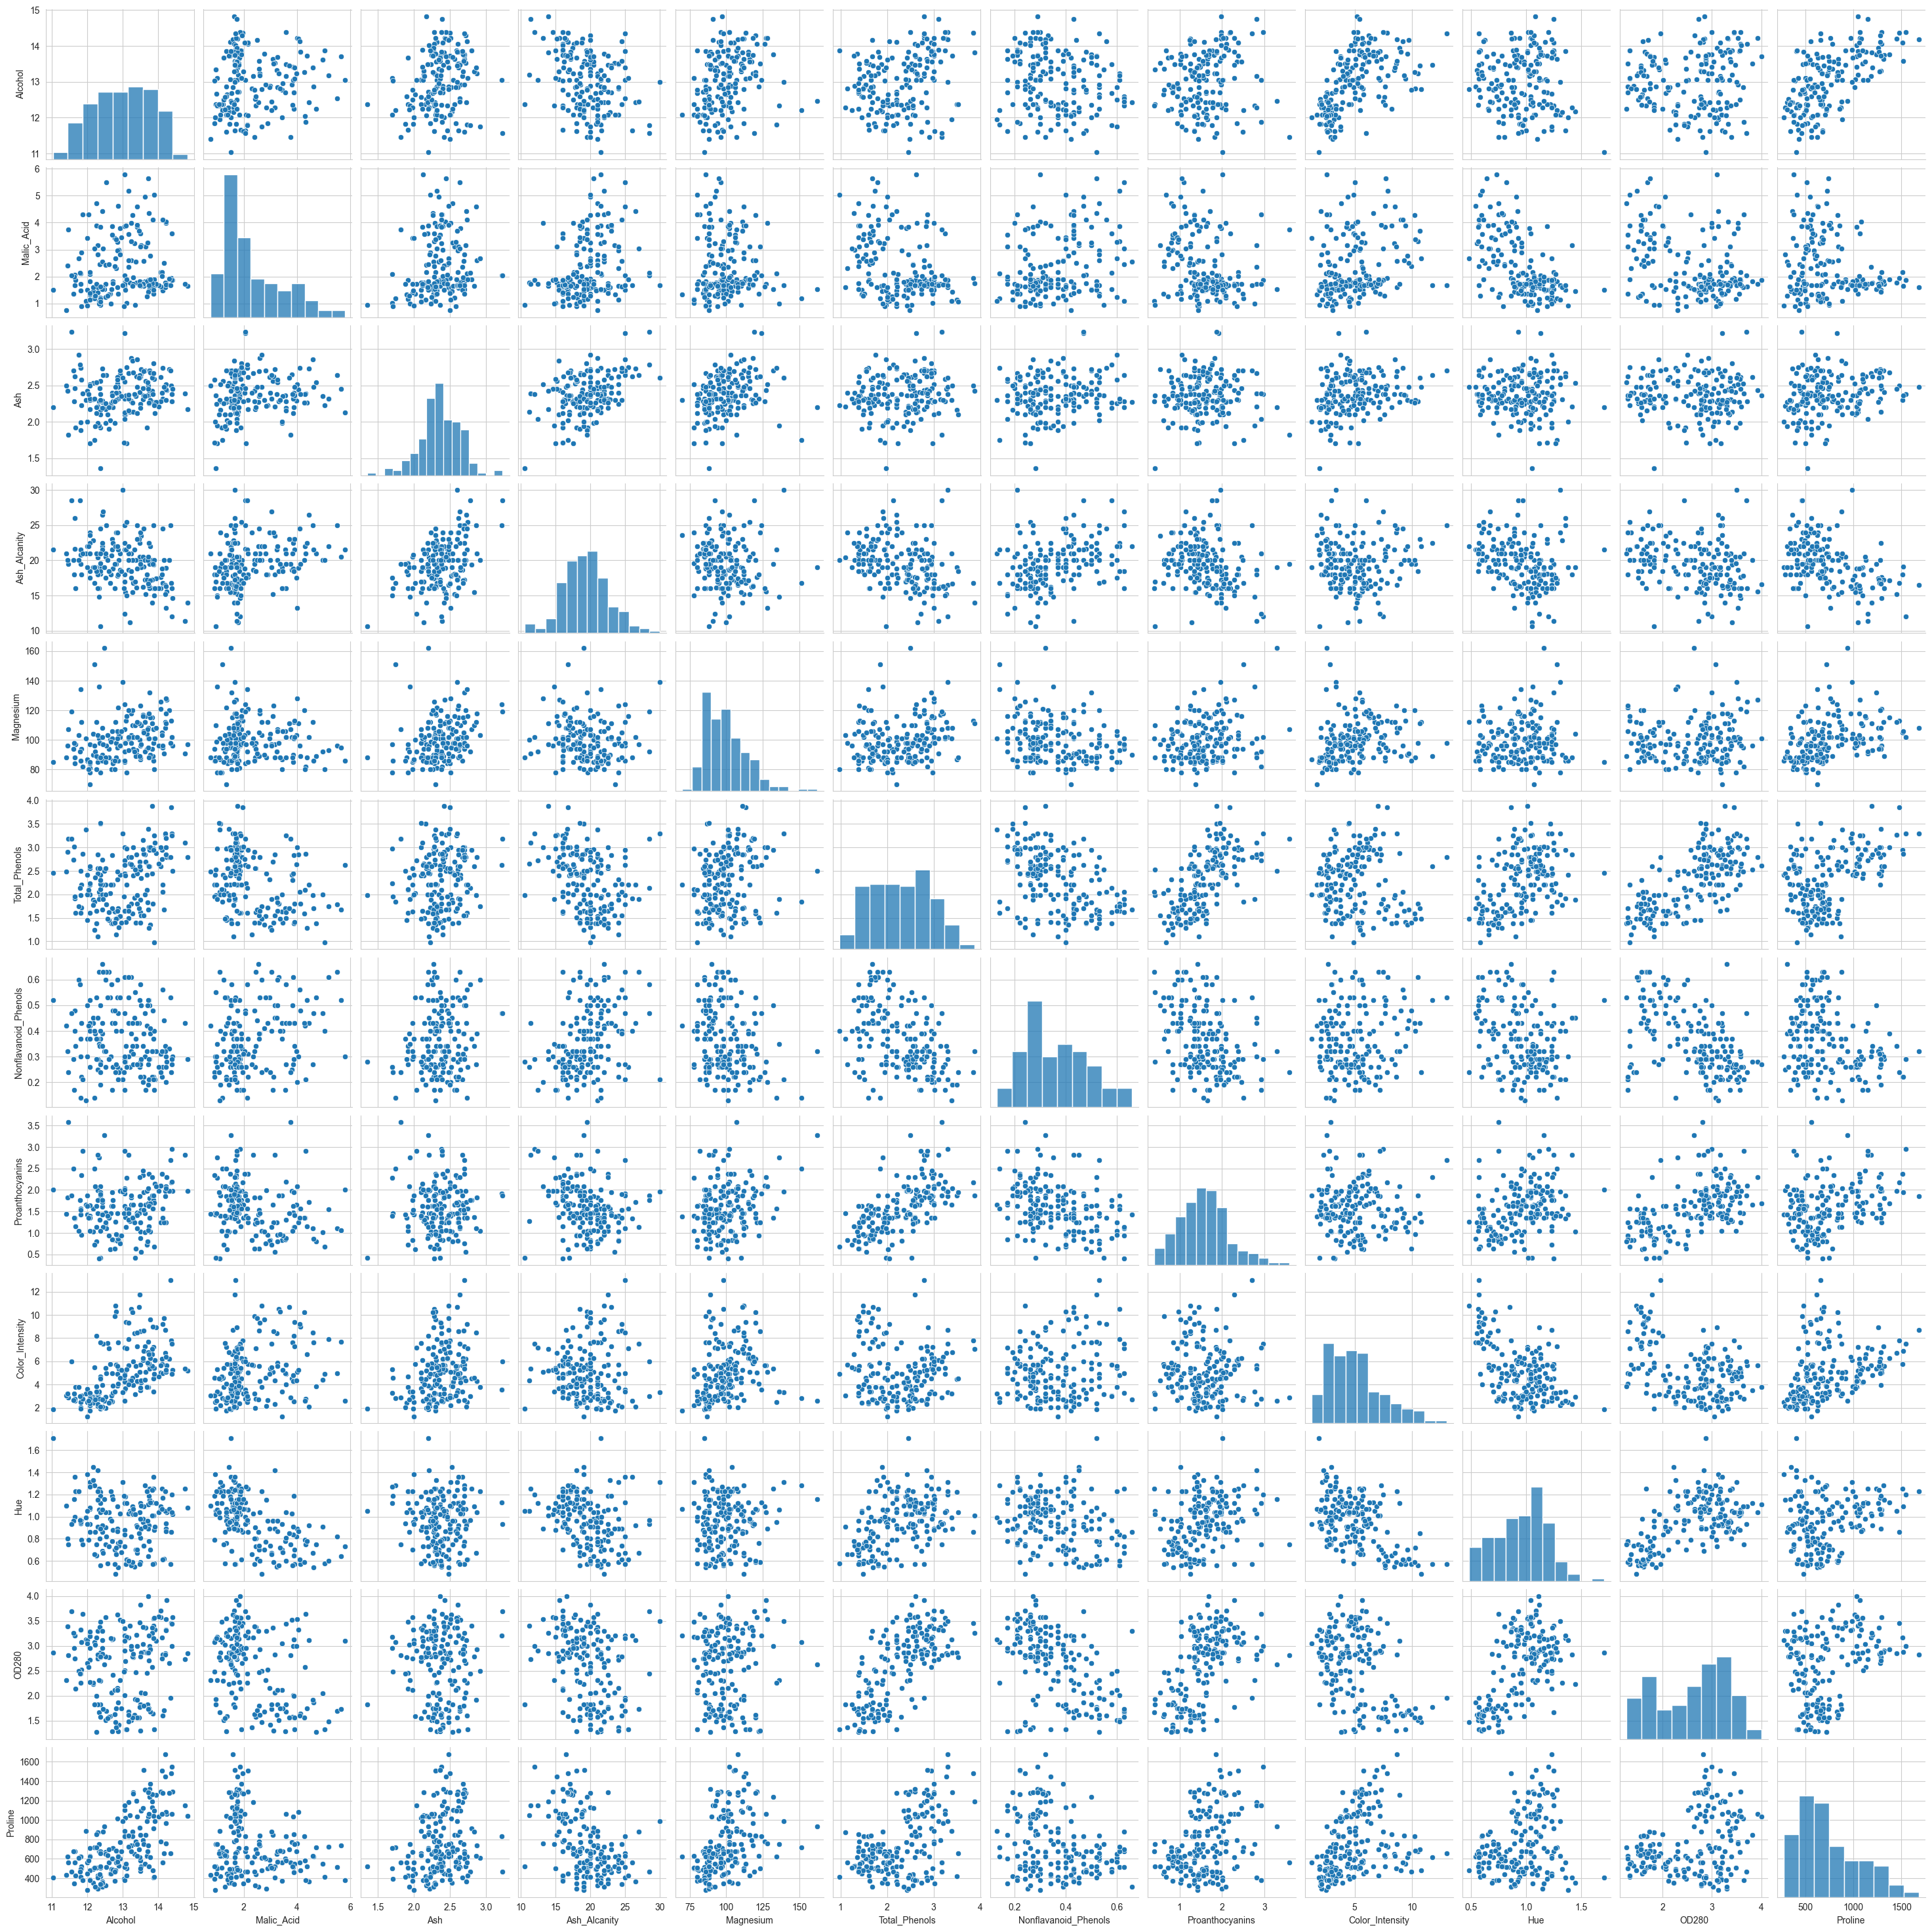

In [393]:
tdf = df.drop('cluster', axis=1)
sns.pairplot(tdf)

In [389]:
list_tdf = []
for i in range(12):
    list_tdf.append(list_df[i].drop('cluster', axis = 1))

list_tdf[3]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
38     13.07        1.50  2.10          15.5       98.0           2.40   
59     12.37        0.94  1.36          10.6       88.0           1.98   
62     13.67        1.25  1.92          18.0       94.0           2.10   
66     13.11        1.01  1.70          15.0       78.0           2.98   
67     12.37        1.17  1.92          19.6       78.0           2.11   
75     11.66        1.88  1.92          16.0       97.0           1.61   
76     13.03        0.90  1.71          16.0       86.0           1.95   
80     12.00        0.92  2.00          19.0       86.0           2.42   
81     12.72        1.81  2.20          18.8       86.0           2.20   
85     12.67        0.98  2.24          18.0       99.0           2.20   
97     12.29        1.41  1.98          16.0       85.0           2.55   
100    12.08        2.08  1.70          17.5       97.0           2.23   
101    12.60        1.34  1.90          18.5       88.0           1.45   
104    12.51        1.73  1.98          20.5       85.0           2.20   

     Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  OD280  \
38                   0.28             1.37             3.70  1.18   2.69   
59                   0.28             0.42             1.95  1.05   1.82   
62                   0.32             0.73             3.80  1.23   2.46   
66                   0.26             2.28             5.30  1.12   3.18   
67                   0.27             1.04             4.68  1.12   3.48   
75                   0.34             1.15             3.80  1.23   2.14   
76                   0.24             1.46             4.60  1.19   2.48   
80                   0.30             1.43             2.50  1.38   3.12   
81                   0.26             1.77             3.90  1.16   3.14   
85                   0.30             1.46             2.62  1.23   3.16   
97                   0.29             1.77             2.90  1.23   2.74   
100                  0.26             1.40             3.30  1.27   2.96   
101                  0.29             1.35             2.45  1.04   2.77   
104                  0.32             1.48             2.94  1.04   3.57   

     Proline  
38    1020.0  
59     520.0  
62     630.0  
66     502.0  
67     510.0  
75     428.0  
76     392.0  
80     278.0  
81     714.0  
85     450.0  
97     428.0  
100    710.0  
101    562.0  
104    672.0

In [390]:
colors = [
    "#FF0000", "#00FF00", "#0000FF", "#FF00FF",
    "#FFFF00", "#00FFFF", "#800000", "#808000",
    "#008080", "#800080", "#FFA500", "#000000"
]


In [391]:
column_names = tdf.columns.tolist()
column_names

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

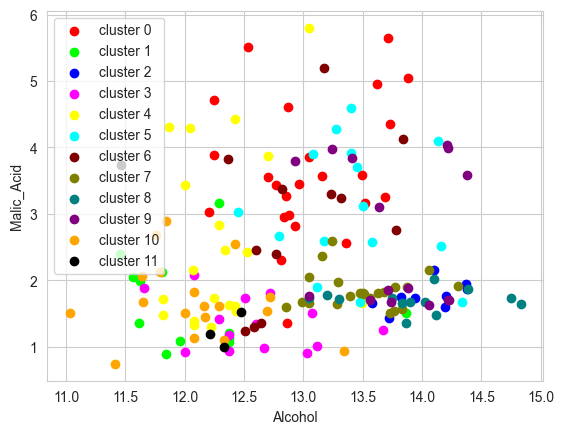

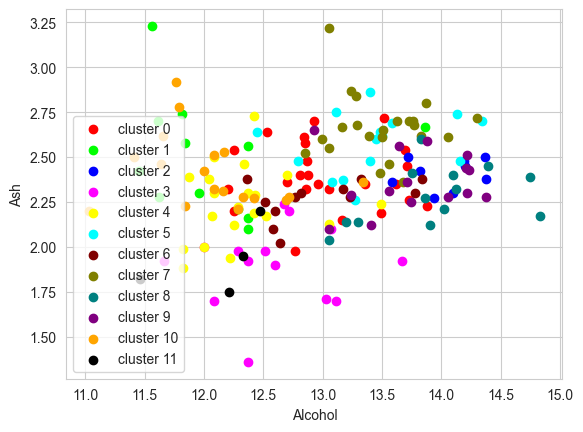

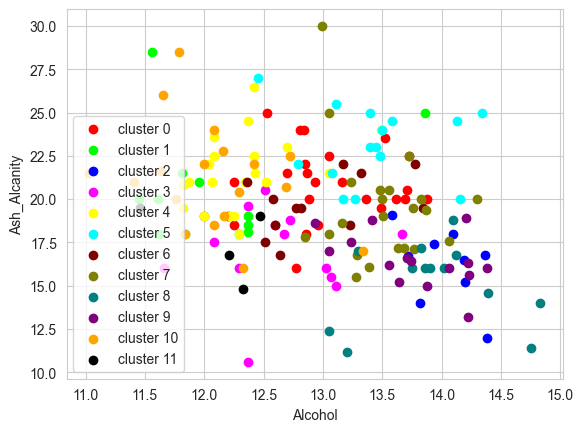

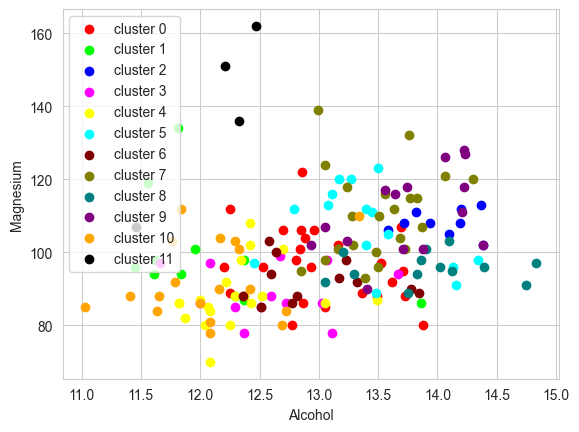

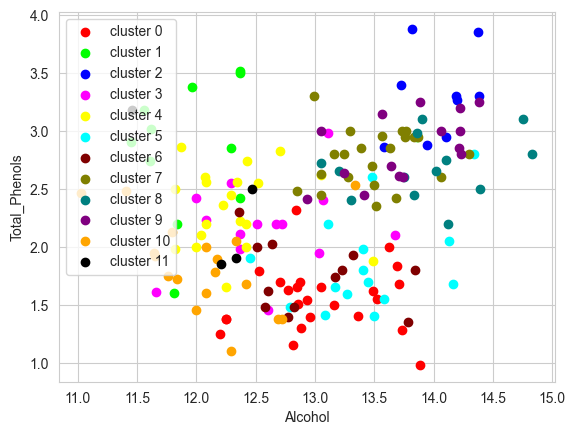

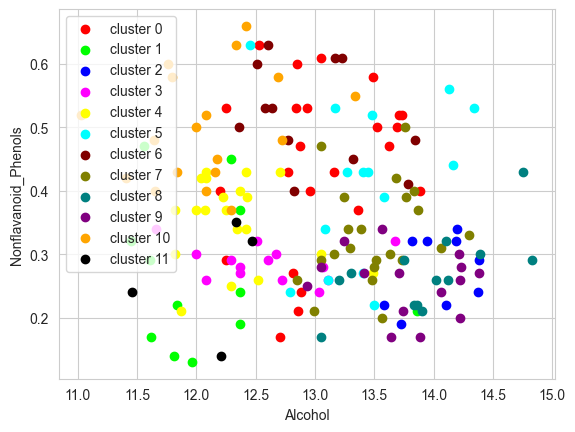

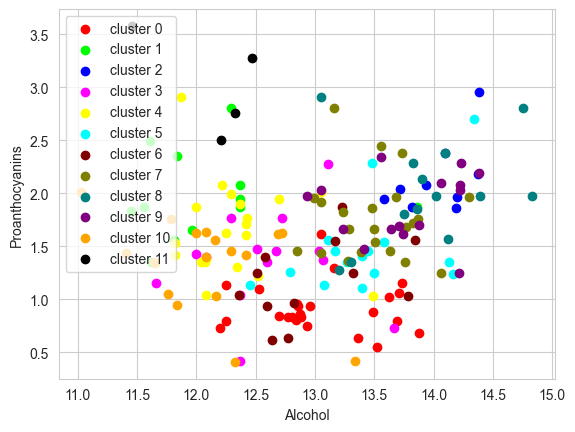

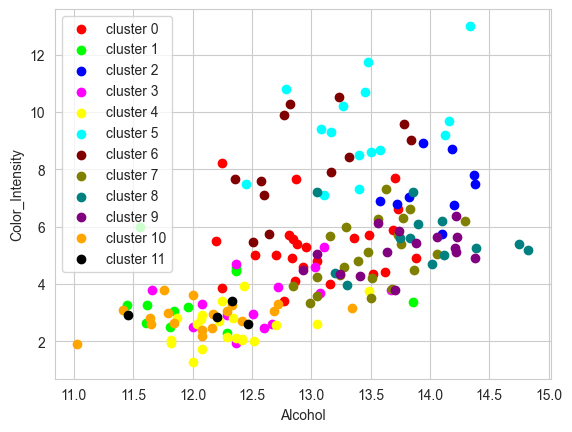

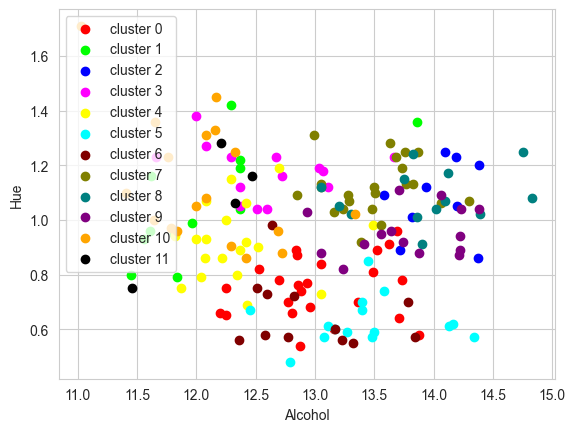

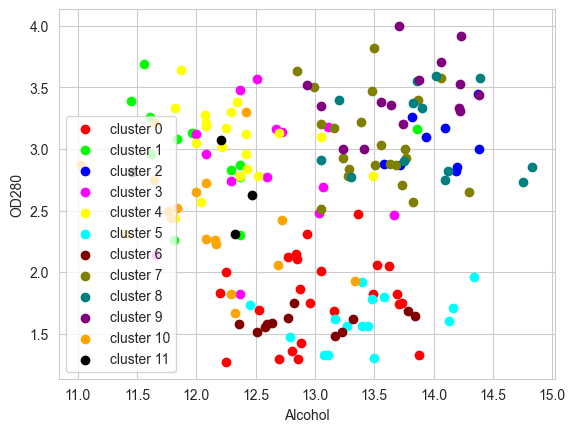

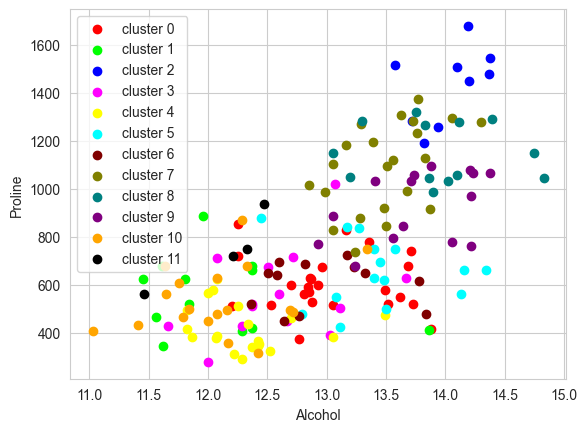

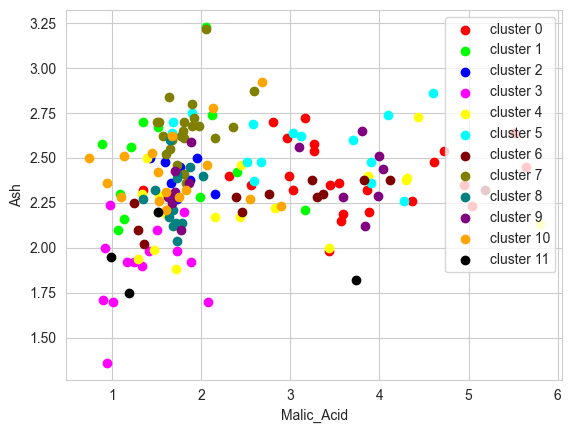

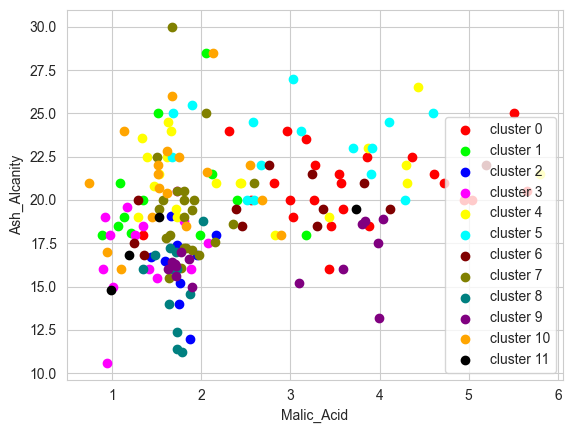

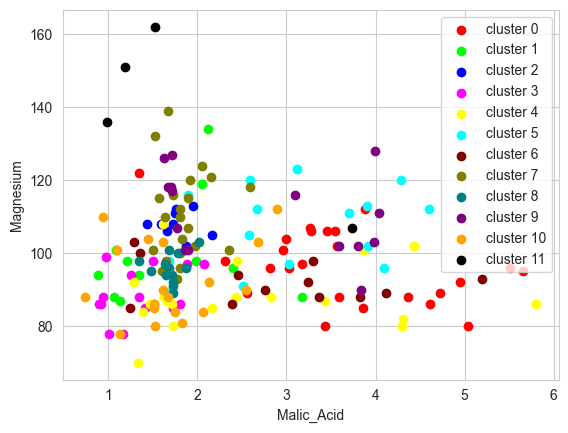

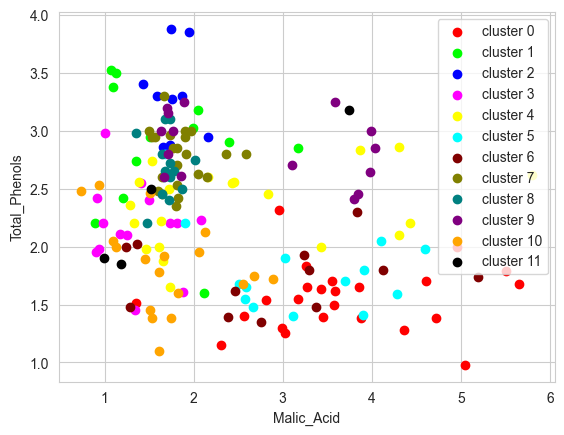

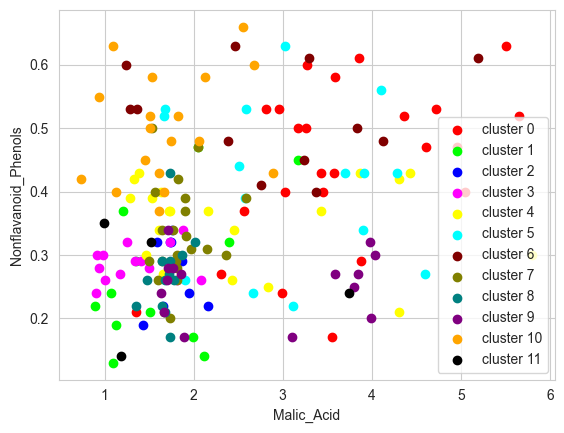

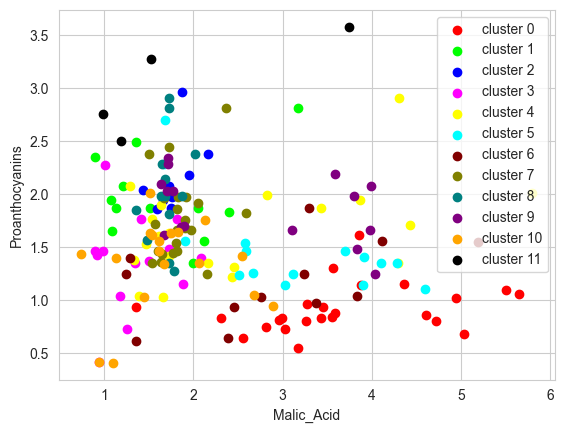

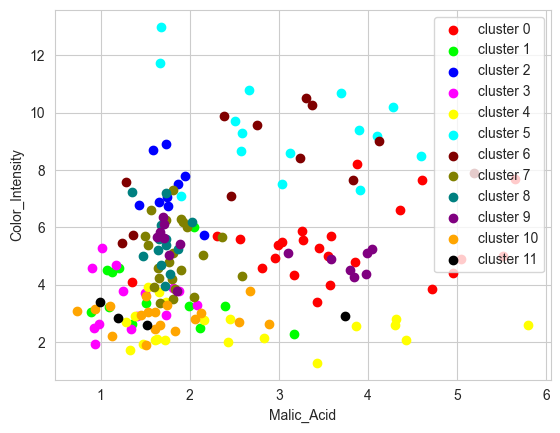

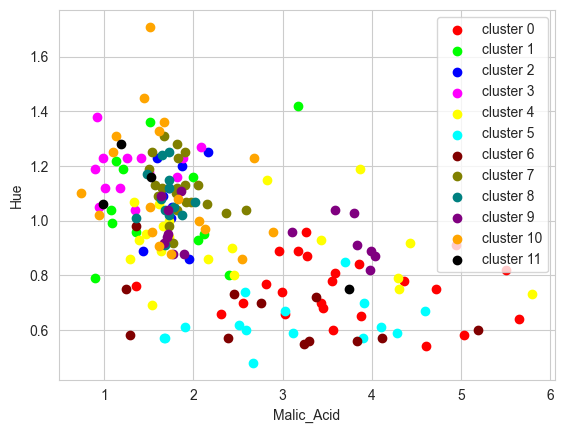

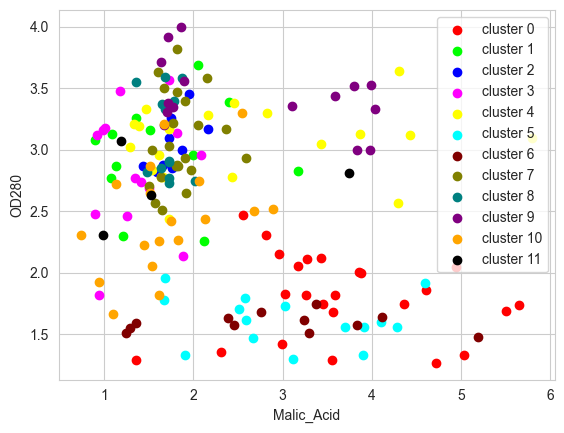

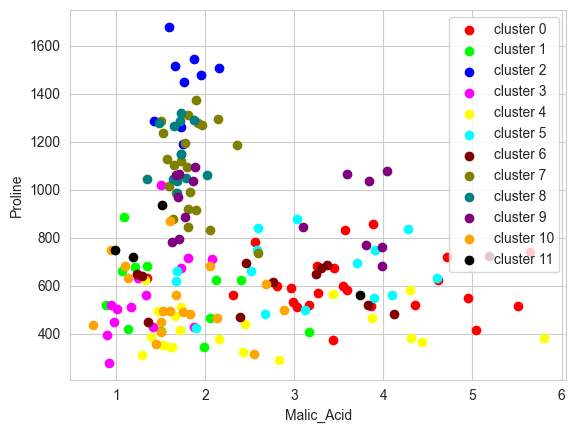

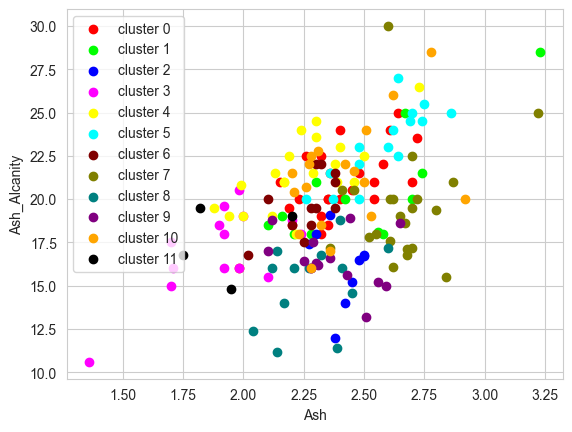

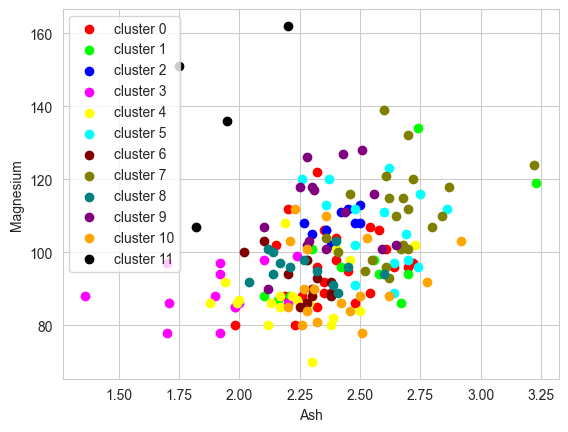

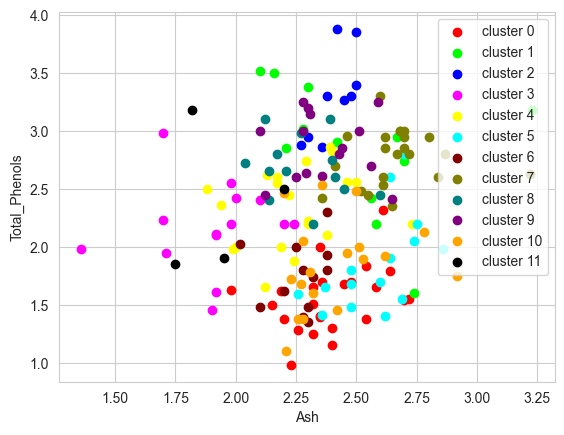

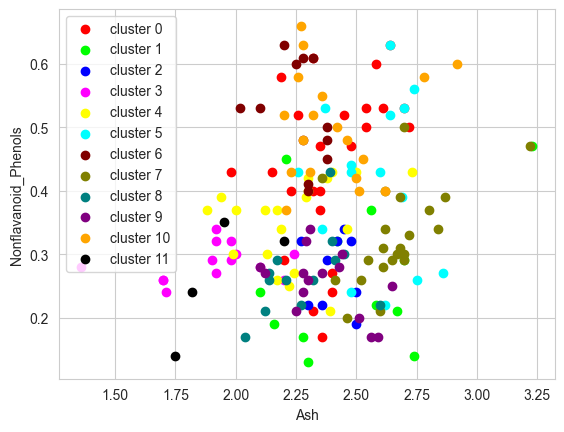

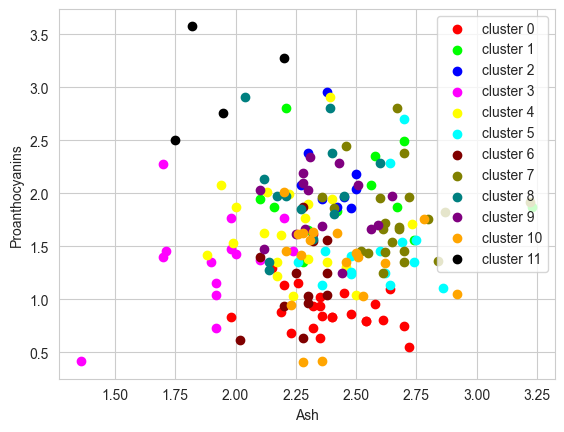

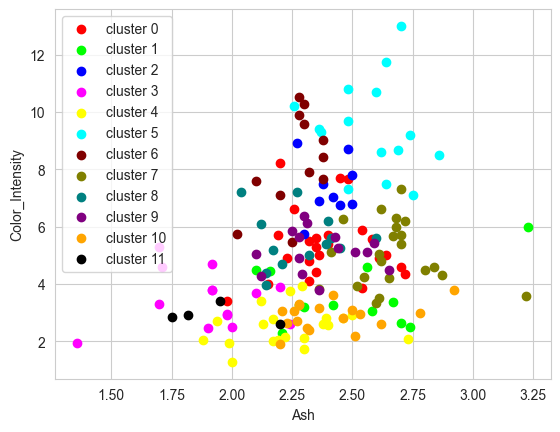

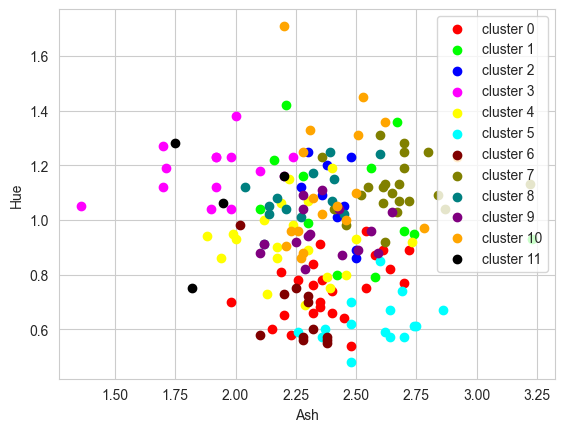

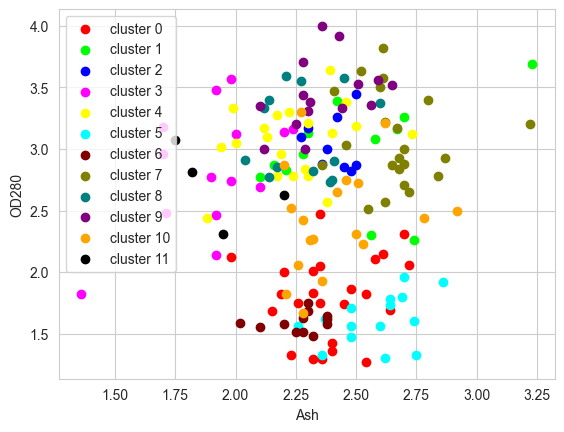

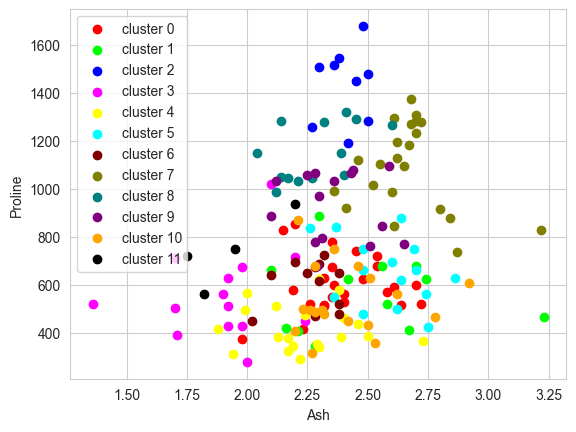

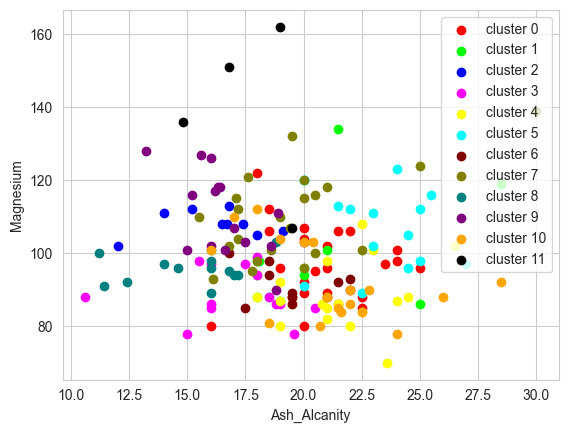

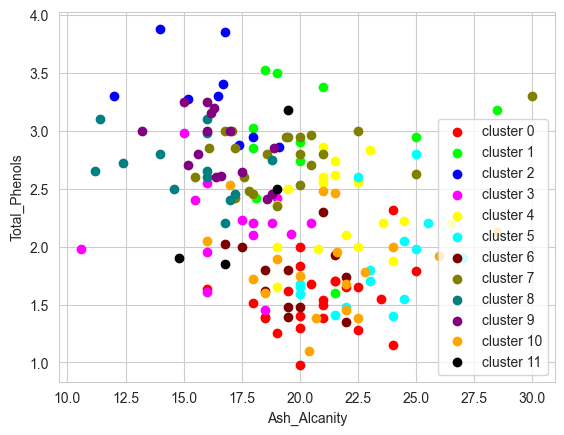

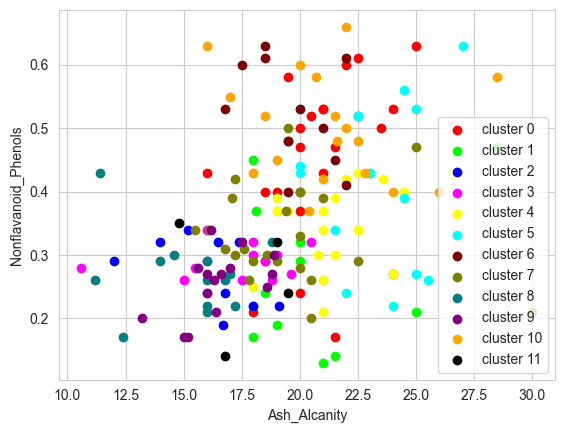

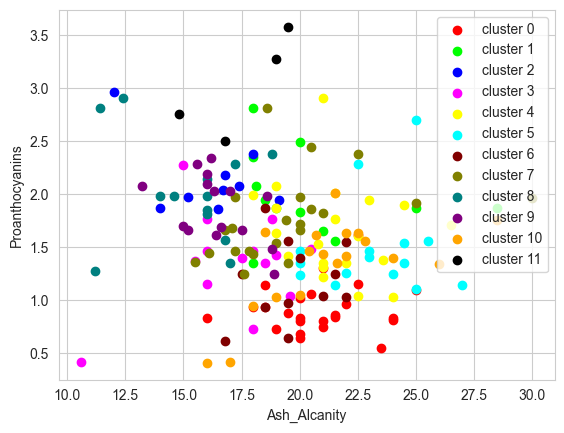

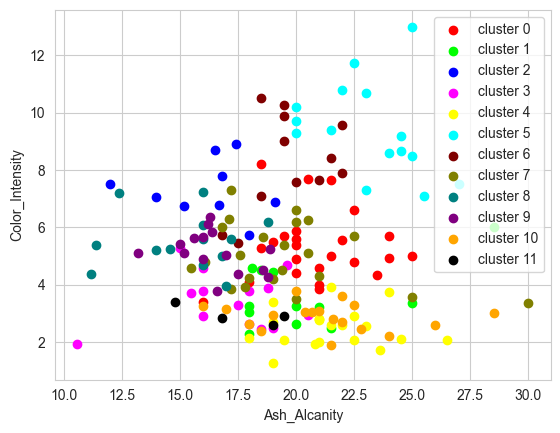

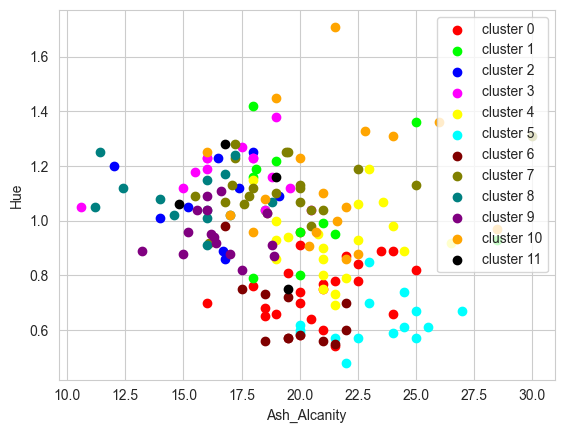

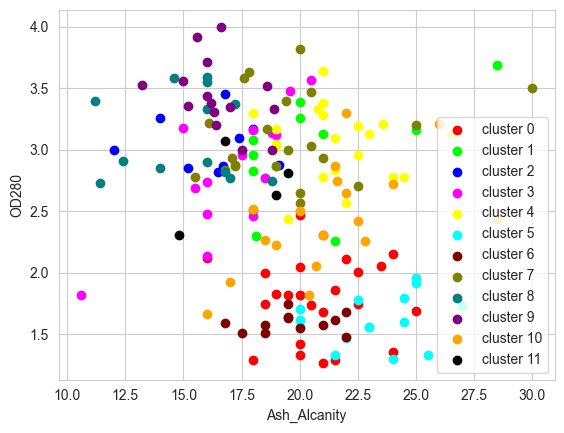

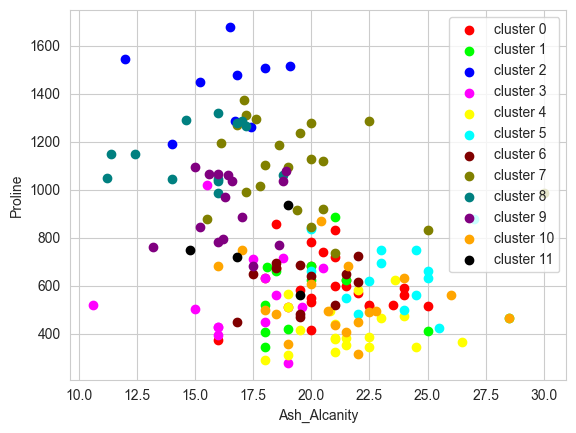

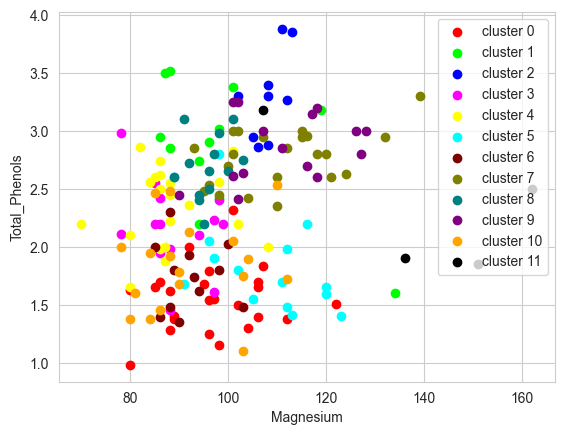

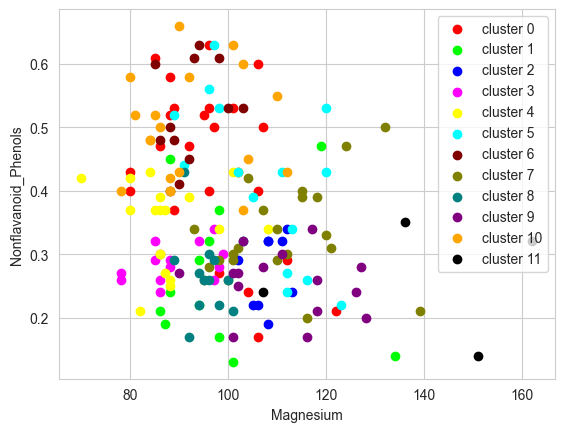

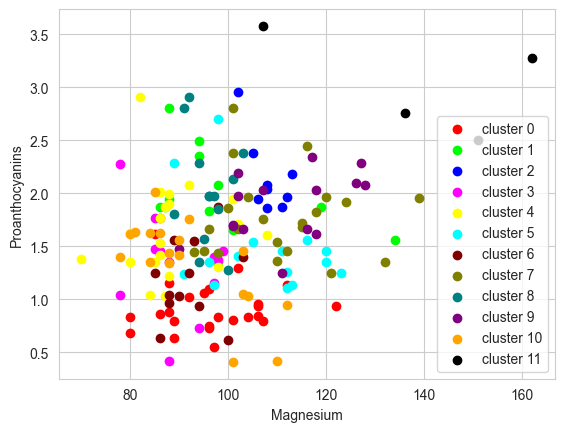

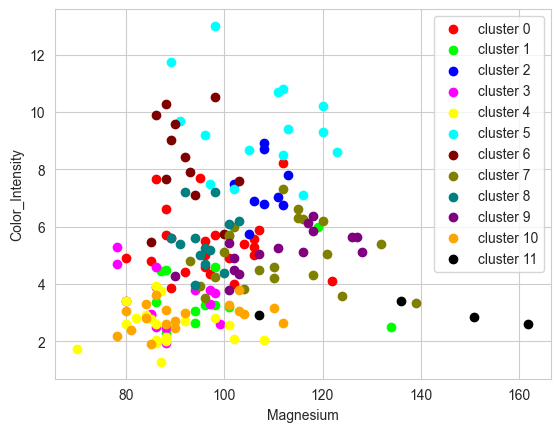

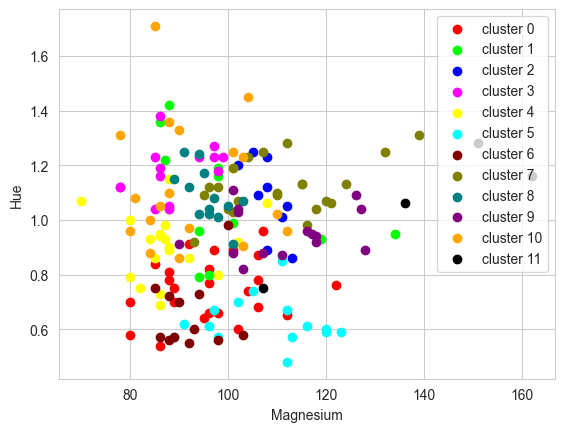

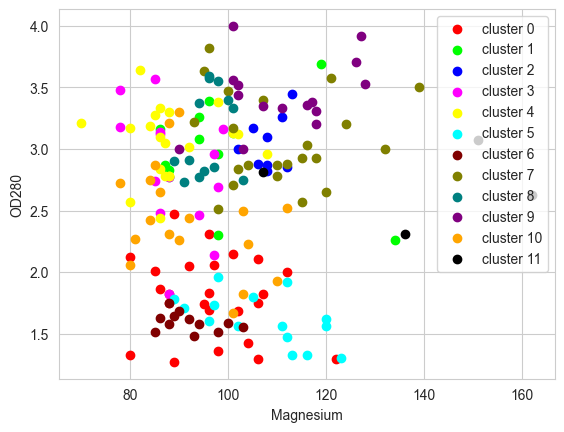

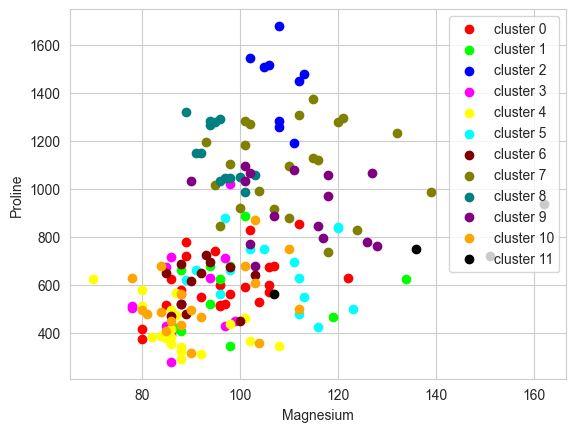

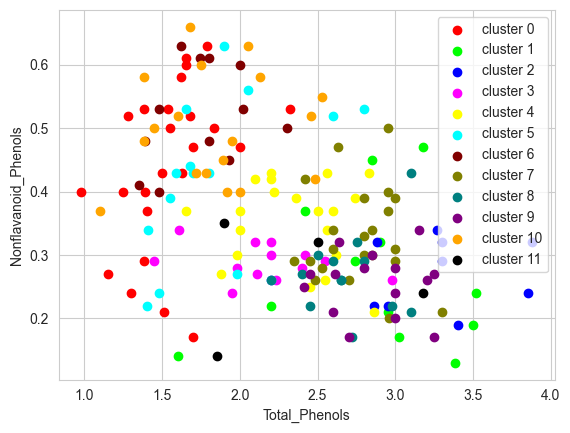

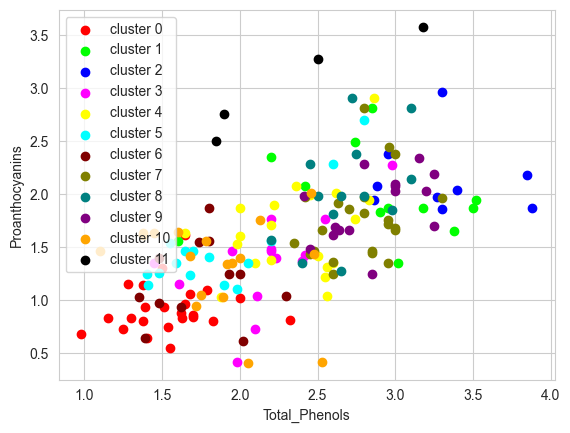

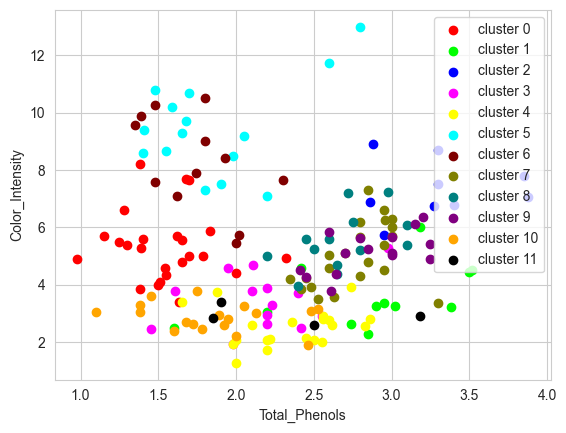

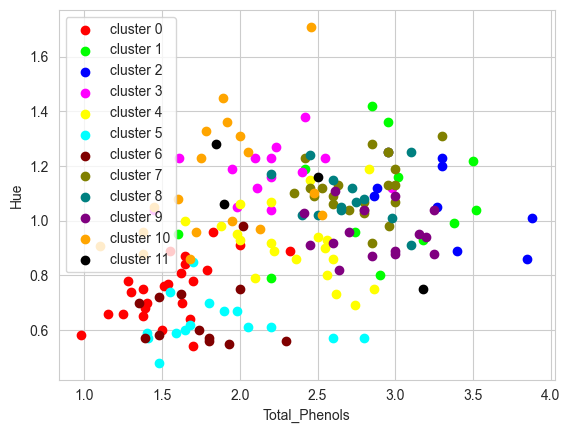

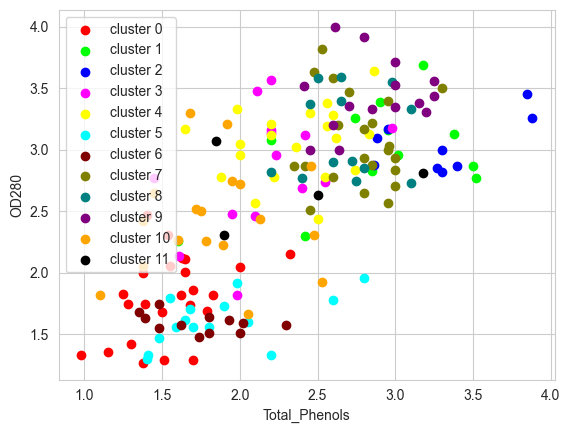

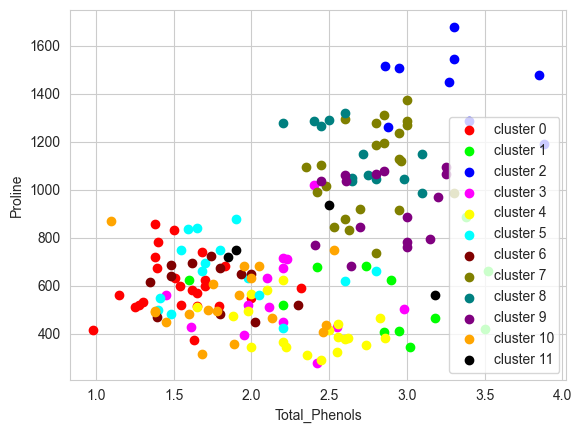

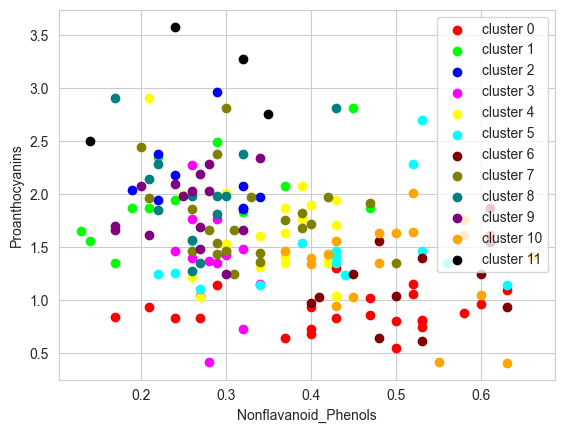

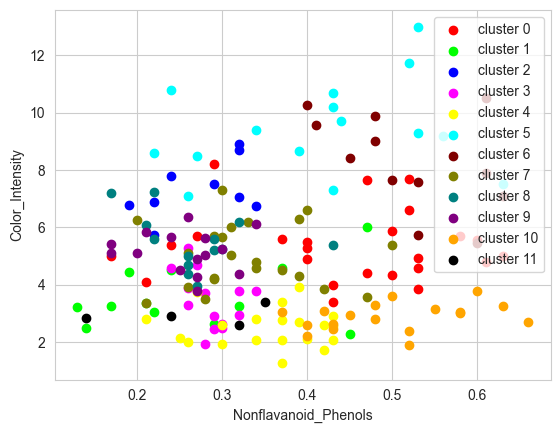

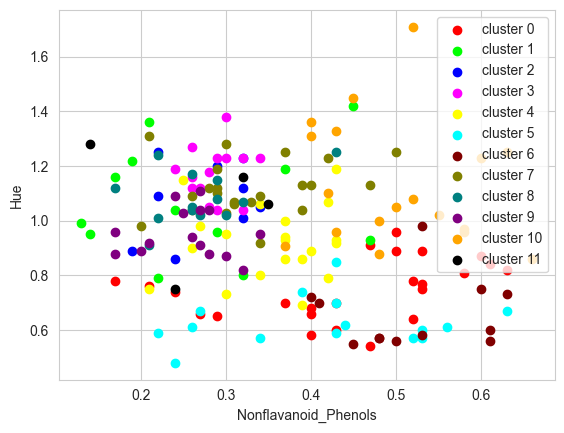

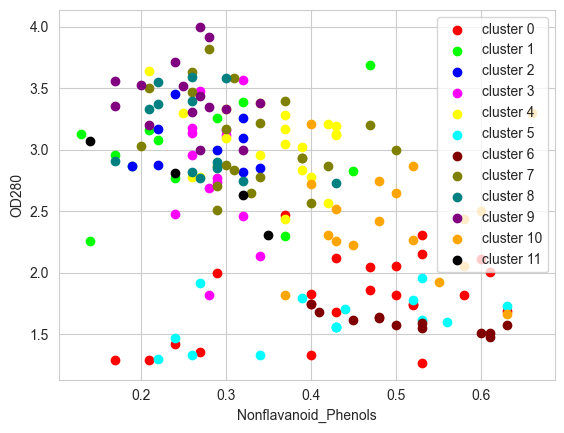

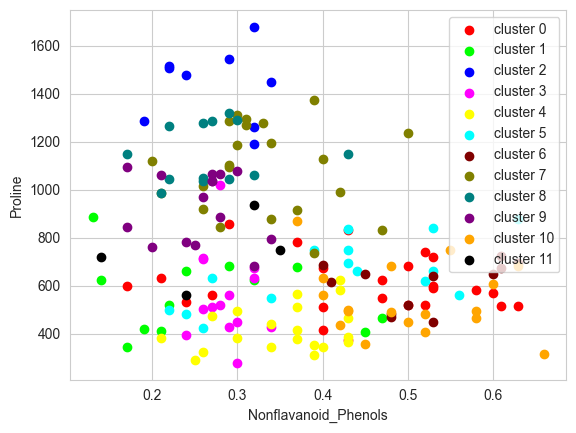

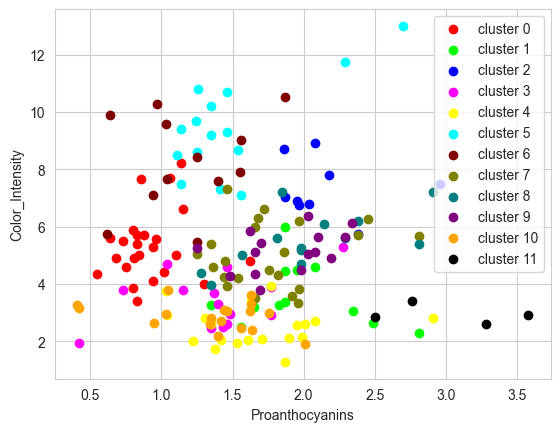

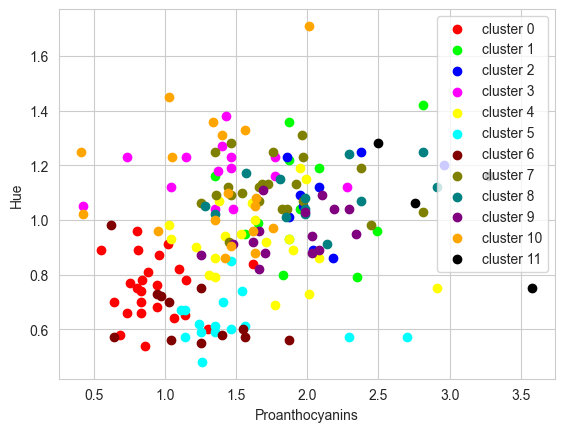

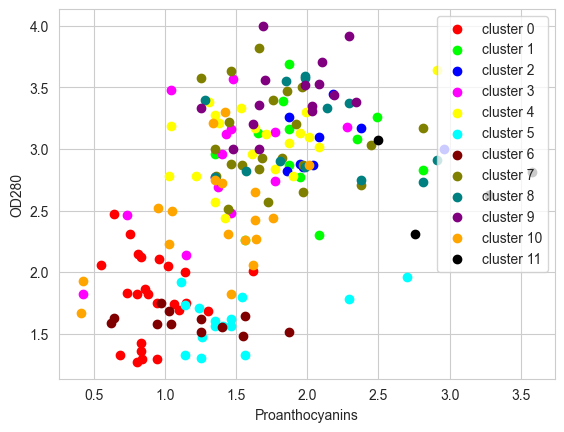

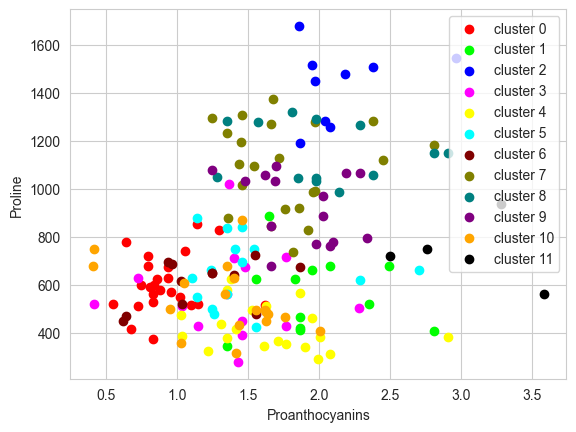

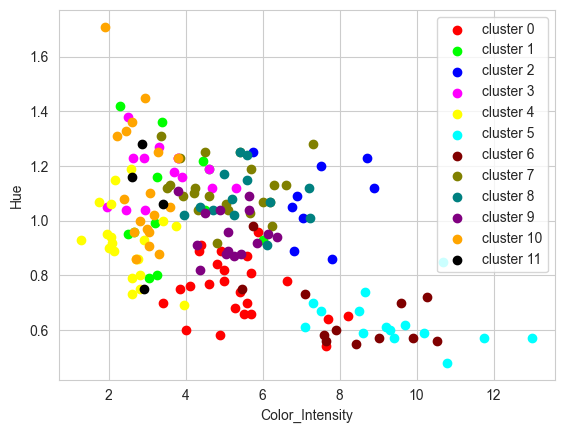

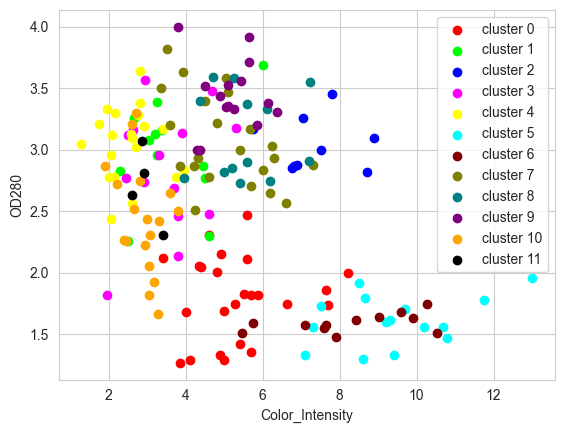

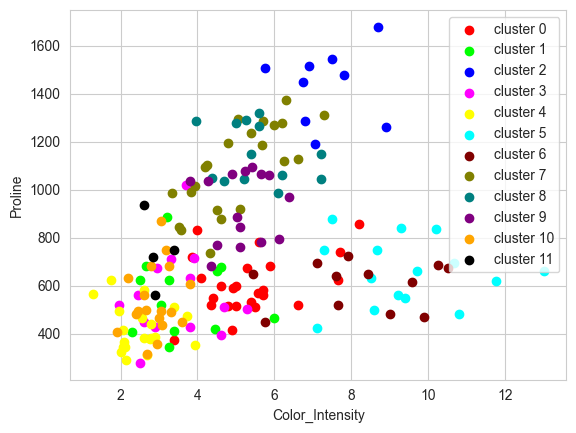

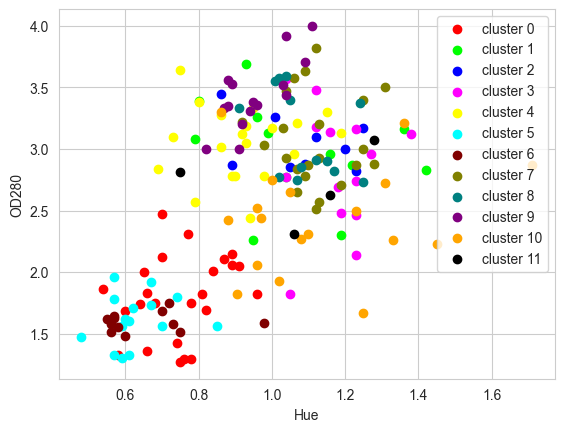

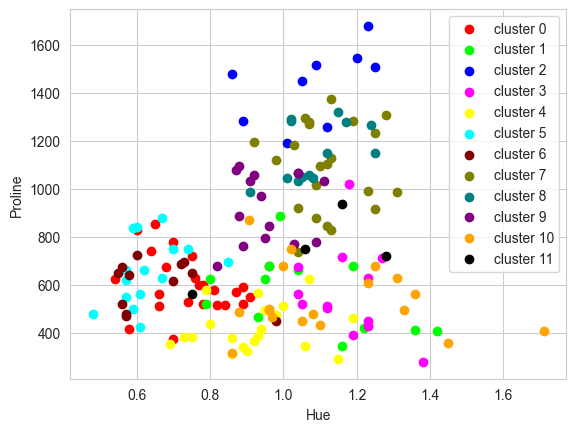

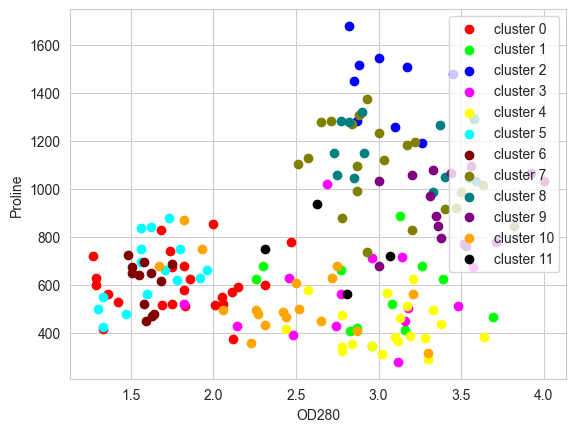

In [394]:
import itertools
# Generate all combinations of column names
combinations = itertools.combinations(column_names, 2)

for x, y in combinations:
    plt.figure()
    for i in range(12):
        plt.scatter(list_df[i][x], list_df[i][y], color=colors[i], label=f'cluster {i}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()


### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


### Cluster 0: High Alcohol, Moderate Color
- **Highest Alcohol**: 13.04
- **Moderate Color Intensity**: 5.34
- **Other Notable Features**: High Proline (603.42), Moderate Total Phenols (1.55)
- **Suggested Name**: *Rich Alcohol Wines*

### Cluster 1: Low Alcohol, High Phenols
- **Alcohol**: 12.09 (Low)
- **Total Phenols**: 2.86 (High)
- **Color Intensity**: 3.60 (Moderate)
- **Suggested Name**: *Phenolic Wines*

### Cluster 2: Very High Proline, Moderate Alcohol
- **Highest Proline**: 1435.22
- **Alcohol**: 14.03 (High)
- **Color Intensity**: 7.35 (High)
- **Suggested Name**: *Premium Wines*

### Cluster 3: Low Alcohol, Moderate Phenols
- **Alcohol**: 12.58 (Moderate)
- **Total Phenols**: 2.17 (Moderate)
- **Color Intensity**: 3.46 (Moderate)
- **Suggested Name**: *Balanced Wines*

### Cluster 4: Moderate Alcohol, Low Color Intensity
- **Alcohol**: 12.31 (Moderate)
- **Color Intensity**: 2.51 (Low)
- **Total Phenols**: 2.34 (Moderate)
- **Suggested Name**: *Light Wines*

### Cluster 5: High Magnesium, High Color Intensity
- **Magnesium**: 107.00 (High)
- **Alcohol**: 13.42 (Moderate)
- **Color Intensity**: 9.45 (Very High)
- **Suggested Name**: *Rich Color Wines*

### Cluster 6: Moderate Alcohol, Low Phenols
- **Alcohol**: 12.97 (Moderate)
- **Total Phenols**: 1.74 (Low)
- **Color Intensity**: 8.26 (High)
- **Suggested Name**: *Light Color Wines*

### Cluster 7: High Magnesium, Balanced Alcohol
- **Magnesium**: 110.41 (High)
- **Alcohol**: 13.50 (High)
- **Color Intensity**: 5.02 (Moderate)
- **Suggested Name**: *Well-Rounded Wines*

### Cluster 8: High Alcohol, High Proline
- **Alcohol**: 13.93 (High)
- **Proline**: 1150.77 (High)
- **Color Intensity**: 5.52 (Moderate)
- **Suggested Name**: *Strong & Bold Wines*

### Cluster 9: High Magnesium, Moderate Phenols
- **Magnesium**: 111.13 (High)
- **Alcohol**: 13.77 (Moderate)
- **Color Intensity**: 5.16 (Moderate)
- **Suggested Name**: *Magnesium-Rich Wines*

### Cluster 10: Low Alcohol, Moderate Phenols
- **Alcohol**: 12.08 (Low)
- **Total Phenols**: 1.85 (Moderate)
- **Color Intensity**: 2.89 (Low)
- **Suggested Name**: *Soft Wines*

### Cluster 11: High Magnesium, High Proanthocyanins
- **Magnesium**: 139.00 (Very High)
- **Proanthocyanins**: 3.03 (High)
- **Color Intensity**: 2.94 (Low)
- **Suggested Name**: *Magnesium & Tannin Rich Wines*


# Best of Luck